<a href="https://colab.research.google.com/github/vachkim/PROJECT/blob/master/Pro_%EC%82%BC%EC%84%B1%EC%B9%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) 삼성카드 Data Competition
- 주제
  + Pendemic 시대를 극복할 마케팅 전략
  + 소비패턴을 분석하여 코로나19 영향을 받은 업종 분석 후, 업종별 카드 이용률 증대 전략 제안

- 데이터 설명
  + Track2_데이터1, Track2_데이터2는 2019 4-5월과 2020년 4-5월 업종별 카드 이용건수입니다 
  + 주어진 데이터를 분석 및 해석하고, 이를 바탕으로 펜데믹 시대를 극복할 마케팅 전략을 수립해 보세요




### 2) Colab 설정
- 제공받은 데이터는 한국어로 이루어져 있다
- 이에 데이터를 원활하게 출력할 수 있도록 나눔 폰트를 미리 설치한다
- 폰트 설치를 위한 방법은 [다음](https://chloevan.github.io/settings/kakao_arena_3_eda/#1-%EB%82%98%EB%88%94%EA%B3%A0%EB%94%95-%ED%8F%B0%ED%8A%B8-%EB%B6%88%EB%9F%AC%EC%98%A4%EA%B8%B0)을 참조한다

In [ ]:
%config InlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144556 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["figure.figsize"] = (20, 10)
register_matplotlib_converters()
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumGothic')
fm._rebuild()

- 또한 Colab의 경고 기능을 무효화해 출력에 이상이 없도록 한다

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 3) 데이터 불러오기
- 구글 드라이브에 포함된 데이터를 Colab에 불러와보자

In [ ]:
from google.colab import drive
ROOT = '/content/drive'
drive.mount(ROOT)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/'My Drive'/'Colab Notebooks'/'samsung_data'

/content/drive/My Drive/Colab Notebooks/samsung_data


In [ ]:
%ls

'[기타] SCDC_공모전 테이블 설명.xlsx'  '[Track1_데이터4] variable_dtype.xlsx'
'[Track1_데이터1] mrc_info.csv'        '[Track2_데이터1] trend_w_demo.csv'
'[Track1_데이터2] samp_train.csv'      '[Track2_데이터2] 업종_예시.xlsx'
'[Track1_데이터3] samp_cst_feat.csv'


- 불러온 데이터 중 Track 1의 데이터는 온라인 매장에서 카드를 사용한 고객에 대한 정보로 코로나 상황과 무관하다
- 본 분석의 목표는 코로나가 업종별로 끼친 영향을 확인하고 
- 카드 사용율을 높일 수 있는 전략을 수립하는 것이기 때문에 Track 1의 데이터를 분석에서 제한다

In [ ]:
import pandas as pd
card = pd.read_csv('[Track2_데이터1] trend_w_demo.csv', encoding='CP949')
descr = pd.read_excel('[기타] SCDC_공모전 테이블 설명.xlsx',sheet_name = '트랙2', encoding='CP949')

- 위에서 card는 코로나 전인 2014.04-05와 코로나 이후인 2020.04-05의 카드 사용 내역에 대한 정보이다
- descr는 card 데이터셋에 대한 설명을 포함하고 있다
- 그 내용은 아래와 같다

In [ ]:
descr.head(15)

,No.,파일목록,파일 용량,데이터 개수,파일 내용,컬럼명,컬럼 내용
0,1.0,trend_w_demo.csv,19.5 MB,452038.0,온라인 가맹점 업종 정보.,YM,이용 연월
1,NaN,NaN,NaN,NaN,NaN,Category,이용 업종
2,NaN,NaN,NaN,NaN,NaN,성별구분,"0: 남성, 1: 여성"
3,NaN,NaN,NaN,NaN,NaN,연령대,연령 구간. 알파벳 순서와 연령 순서는 무관.
4,NaN,NaN,NaN,NaN,NaN,기혼스코어,카드 이용 고객이 기혼일 확률
5,NaN,NaN,NaN,NaN,NaN,유아자녀스코어,카드 이용 고객이에게 유아자녀가 있을 확률
6,NaN,NaN,NaN,NaN,NaN,초등학생자녀스코어,카드 이용 고객이에게 초등학생 자녀가 있을 확률
7,NaN,NaN,NaN,NaN,NaN,중고생자녀스코어,카드 이용 고객이에게 중고생 자녀가 있을 확률
8,NaN,NaN,NaN,NaN,NaN,대학생자녀스코어,카드 이용 고객이에게 대학생 자녀가 있을 확률
9,NaN,NaN,NaN,NaN,NaN,전업주부스코어,카드 이용 고객이 전업주부일 확률


### 4) 데이터 확인
- 불러온 card 데이터셋의 변수명과 값을 확인한다

In [ ]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452038 entries, 0 to 452037
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   YM         452038 non-null  int64 
 1   Category   452038 non-null  object
 2   성별구분       452038 non-null  int64 
 3   연령대        452038 non-null  object
 4   기혼스코어      452038 non-null  object
 5   유아자녀스코어    452038 non-null  object
 6   초등학생자녀스코어  452038 non-null  object
 7   중고생자녀스코어   452038 non-null  object
 8   대학생자녀스코어   452038 non-null  object
 9   전업주부스코어    452038 non-null  object
dtypes: int64(2), object(8)
memory usage: 34.5+ MB


 - card 데이터에는 카드 사용 연월과 매장 유형, 카드 사용자에 대한 정보가 담겨 있다
 - 결측치를 확인하면 아래와 같다

In [ ]:
card.isnull().sum()

YM           0
Category     0
성별구분         0
연령대          0
기혼스코어        0
유아자녀스코어      0
초등학생자녀스코어    0
중고생자녀스코어     0
대학생자녀스코어     0
전업주부스코어      0
dtype: int64

### 5) 데이터 전처리
- 확인한 데이터셋을 분석이 용이하도록 전처리한다

#### 1) 연도 정보 추출
- 데이터셋에는 YM이라는 변수명에 코로나 전인 2019년의 4,5월의 정보와 코로나 후인 2020년 4,5월의 정보가 있다
- 여기에서 연도 정보만을 추출해 분류하면 코로나에 따른 카드 사용 패턴의 변화를 더 명확히 확인할 수 있을 것이다

In [ ]:
YM = list(card['YM']) 
#데이터프레임에서 칼럼을 지정하면 전체 데이터를 가져오기 때문에
#리스트로 우선 변환 후 for문을 돌려야 개별 값을 평가할 수 있다
Year = []
for item in YM:
  if item == 201904: # 2019년의 데이터는 2019라는 이름으로 Year에 저장
    Year.append(2019)
  elif item == 201905:
    Year.append(2019)
  else: # 그 외의 경우에는 2020이라는 이름으로 저장한다
    Year.append(2020)

card['Year']=Year

#### 2) 스코어 점수 인코딩
- high, mid, low로 분류된 스코어 점수를 숫자값으로 인코딩하여 분석에 용이하도록 한다

In [ ]:
mapping = {'high':2,'mid':1,'low':0}
card['기혼스코어']=card['기혼스코어'].map(mapping)
card['유아자녀스코어']=card['유아자녀스코어'].map(mapping)
card['초등학생자녀스코어']=card['초등학생자녀스코어'].map(mapping)
card['중고생자녀스코어']=card['중고생자녀스코어'].map(mapping)
card['대학생자녀스코어']=card['대학생자녀스코어'].map(mapping)
card['전업주부스코어']=card['전업주부스코어'].map(mapping)

#### 3) 자녀 정보 추출
- 유아, 초등학생, 중고생, 대학생으로 나뉜 자녀에 대한 정보를 
- 평균값으로 통합해 자녀 유무에 대한 전체적인 확률을 확인할 수 있도록 하자

In [ ]:
card['자녀유무']=card[['유아자녀스코어','초등학생자녀스코어','중고생자녀스코어','대학생자녀스코어']].mean(1)

#### 4) 성별 정보 
- 0과 1로 구분되어 있는 '성별구분' 열을 0=남성, 1=여성으로 새로 인코딩한다
- 시각화를 했을 때 데이터 셋 확인이 더욱 용이하게 하기 위함이다

In [ ]:
mapping = {0:'남성',1:'여성'}
card['성별']= card['성별구분'].map(mapping)

- 전처리한 데이터셋의 칼럼 순서를 변경해 분석에 용이하도록 한다

In [ ]:
card = card.reindex(columns=['YM','Year','Category','성별','성별구분','연령대','기혼스코어','자녀유무',
                             '유아자녀스코어', '초등학생자녀스코어','중고생자녀스코어','대학생자녀스코어','전업주부스코어'])

In [ ]:
card.head(3)

,YM,Year,Category,성별,성별구분,연령대,기혼스코어,자녀유무,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,2020,할인점,남성,0,F,2,0.75,0,2,1,0,0
1,202005,2020,취미,남성,0,B,2,0.50,0,1,1,0,0
2,202005,2020,오픈마켓/소셜,여성,1,D,1,0.75,1,1,1,0,1


In [ ]:
card.tail(3)

,YM,Year,Category,성별,성별구분,연령대,기혼스코어,자녀유무,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
452035,201904,2019,할인점,여성,1,H,2,0.0,0,0,0,0,0
452036,201904,2019,할인점,남성,0,H,2,0.0,0,0,0,0,0
452037,201904,2019,할인점,여성,1,B,2,0.5,0,1,1,0,1


### 6) 데이터 시각화
- 전처리한 데이터를 여러 관점으로 시각화에 유의미한 분석 포인트를 도출한다
- 우선 시각화를 위한 라이브러리를 가져온다

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1) 연도에 따른 카드 사용 빈도의 차이 
- 코로나 이전과 이후인 2019, 2020년에서 카드 사용 빈도의 차이가 있는지 확인한다
- 빈도는 연도값을 바탕으로 데이터프레임을 구분한 뒤, 각 프레임의 인덱스 수로 확인한다

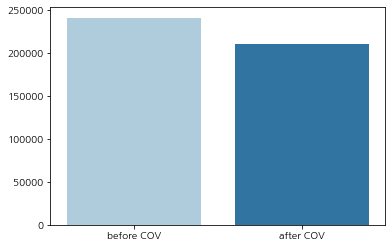

In [ ]:
before = card[card['Year']==2019] ; bef_num = len(before.index)
after = card[card['Year']==2020] ; aft_num = len(after.index)
xbar=['before COV','after COV']
ybar=[bef_num,aft_num]
plt.figure(figsize=(6,4))
sns.barplot(x=xbar,y=ybar,palette='Paired');

- 시각화 결과 코로나 이후인 2020년에 카드 사용 빈도가 감소한 것을 확인할 수 있다

#### 2) 카테고리별 카드 사용 빈도의 차이
- 구체적으로 카테고리별로 코로나 전후의 차이가 어떻게 나타나는지 확인한다

<Figure size 1080x720 with 0 Axes>

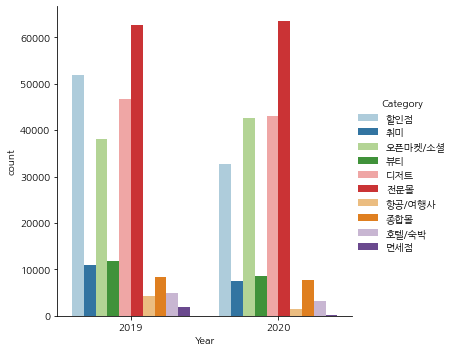

In [ ]:
plt.figure(figsize=(15,10));
ax = sns.catplot(x='Year',kind='count',hue='Category', palette='Paired',data=card);

- 위 표를 보았을 때는 할인점이 큰 폭으로 감소하고 오픈마켓/소셜에서의 카드 사용 빈도가 증가한 것으로 보인다
- 하지만 위 도표는 빈도 차이를 나타내고 있을 뿐, 감소하거나 증가한 비율에 대한 정보를 포함하고 있지 않다
- 이에 2019년과 2020년의 데이터를 기반으로 카테고리별 변화율을 구해 
- 코로나 상황에서 가장 크게 영향을 받은 분야를 확인해보도록 하겠다

#### 3) 카드 사용 빈도의 감소율 확인
- [다음](https://stackoverflow.com/questions/30926840/how-to-check-change-between-two-values-in-percent)을 참조해 변화율을 구하는 함수를 다음과 같이 정의한다

In [ ]:
def percentage_change(current, previous):
    if previous != 0 :
        return float(current - previous) / abs(previous) * 100
    else:
        return "undefined"

- 카테고리와 연도별로 카드를 사용한 빈도를 구하는 함수를 다음과 같이 정의한다
- 또한 아래 함수에 변수를 넣기 위해 카테고리값들을 리스트로 미리 만들어두었다

In [ ]:
def ratio(category):
  cat_19 = len(card[card['Year']==2019][card['Category']==category].index)
  cat_20 = len(card[card['Year']==2020][card['Category']==category].index)
  return percentage_change(cat_20,cat_19)

In [ ]:
cat_list = ['디저트','호텔/숙박','항공/여행사','취미','할인점','뷰티',
            '면세점','종합몰','오픈마켓/소셜','전문몰']

- 위 2개의 함수를 통해 다음과 같은 방법으로 변화율을 구할 수 있다

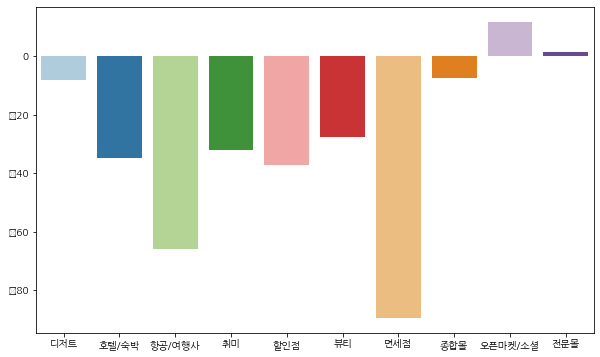

In [ ]:
diff = []
for item in cat_list:
  x = ratio(item)
  diff.append(x)
xbar = cat_list
ybar = diff
plt.figure(figsize=(10,6))
pic = sns.barplot(x=xbar,y=ybar,palette='Paired');

- 시각화 결과 대다수의 카테고리에서 코로나 이후 카드 사용 빈도의 감소가 확인되었다 
- 특히 면세점과 항공/여행사 그리고 호텔/숙박과 같이 여행과 관련된 카테고리가 가장 큰 타격을 입은 것으로 보인다
- 또한 주목해볼 수 있는 것은 오픈마켓/소셜과 전문몰과 같이 
- 온라인으로 운영되는 카테고리에서는 사용 빈도의 증가가 확인되었다는 것이다
- 여기에서 코로나가 온라인과 오프라인 매장에 상반되는 영향을 끼친 것임을 생각해볼 수 있다
- 이를 구체적으로 확인할 수 있는 방법은 아래와 같다

#### 4) 매장 유형별 변화율 확인
- Category변수를 오프라인과 온라인으로 그룹화해 새로운 칼럼을 만든다
- 이후 위와 동일한 방식으로 매장 유형별 변화율을 확인한다

In [ ]:
category = list(card['Category'])
group = []
for item in category:
  if item == '종합몰':
    group.append('online')
  elif item== '오픈마켓/소셜':
    group.append('online')
  elif item=='전문몰':
    group.append('online')
  else:
    group.append('offline')

card['Group'] = group
card = card.reindex(columns=['YM','Year','Category','Category2','Group','성별구분','연령대','기혼스코어','자녀유무','유아자녀스코어',
                             '초등학생자녀스코어','중고생자녀스코어','대학생자녀스코어','전업주부스코어'])

In [ ]:
off_19 = len(card[card['Year']==2019][card['Group']=='offline'].index) #2019년 오프라인 빈도수
off_20 = len(card[card['Year']==2020][card['Group']=='offline'].index) #2020년 오프라인 빈도수
on_19 = len(card[card['Year']==2019][card['Group']=='online'].index) #2020년 온라인 빈도수
on_20 = len(card[card['Year']==2020][card['Group']=='online'].index) #2020년 온라인 빈도수

<Figure size 576x432 with 0 Axes>

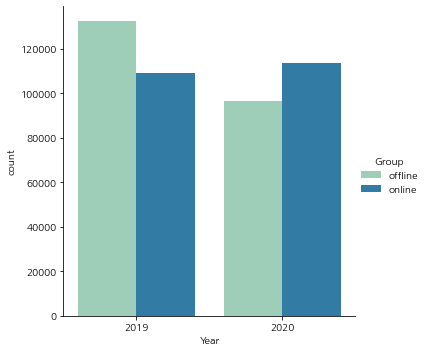

In [ ]:
plt.figure(figsize=(8,6));
sns.catplot(x='Year', kind='count', hue='Group', palette='YlGnBu',data=card);

- 실제로 오프라인 매장은 코로나 이후 카드 사용 빈도가 큰 폭으로 감소한 반면
- 온라인 매장에서는 카드 사용 빈도가 소폭 증가한 경향을 보인다
- 구체적인 변화율은 다음과 같다

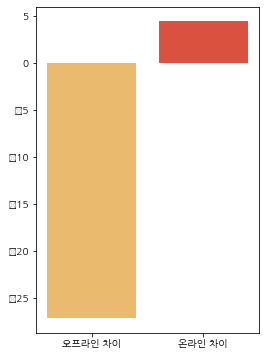

In [ ]:
off_diff = percentage_change(off_20,off_19)
on_diff = percentage_change(on_20,on_19)
xbar=['오프라인 차이','온라인 차이']
ybar=[off_diff,on_diff]
plt.figure(figsize=(4,6))
sns.barplot(x=xbar,y=ybar,palette='YlOrRd');

### 7) 전략 수립
- 지금까지의 시각화 결과를 바탕으로 마케팅 전략 수립을 시작해보자
- 접근방법은 다음 2가지로 나눌 수 있다 
  + 사용 빈도가 감소한 오프라인 항목에 대해서 사용 빈도를 증대할 수 있는 방안 수립
  + 사용 빈도에서 영향을 받지 않은 온라인 항목에서 마케팅 활동을 하여 사용 빈도 증대

In [ ]:
card_copy = card.copy()

#### 1) 오프라인 매장 분석
- 마케팅 전략을 효율적으로 수립하기 위해
- 오프라인 매장 중에서 사용 빈도가 높은 카테고리를 타겟으로 한다
- 타겟을 구하기 위해 다음과 같은 방법으로 오프라인 전체 빈도에서 카테고리별로 차지하는 비율을 구해본다

In [ ]:
Offline = card[card['Group']=='offline']

- 비율을 확인하기 위해서 우선 카테고리별 빈도수를 구하는 함수를 다음과 같이 정의한다

In [ ]:
def count1(cat1):
  return len(Offline[Offline['YM']==201904][Offline['Category']==cat1].index) 
def count2(cat2):
  return len(Offline[Offline['YM']==201905][Offline['Category']==cat2].index)
def count3(cat3):
  return len(Offline[Offline['YM']==202004][Offline['Category']==cat3].index)
def count4(cat4):
  return len(Offline[Offline['YM']==202005][Offline['Category']==cat4].index)

- 오프라인 매장을 구성하는 카테고리 리스트를 만들고 For문을 활용하여 다음과 같이 빈도수를 구한다

In [ ]:
off_list = ['디저트','호텔/숙박','항공/여행사','취미','할인점','뷰티','면세점']

In [ ]:
bef_04=[];bef_05=[];aft_04=[];aft_05=[]
for item in off_list:
  bef_04.append(count1(item))
  bef_05.append(count2(item))
  aft_04.append(count3(item))
  aft_05.append(count4(item))

print(bef_04);print(bef_05);print(aft_04);print(aft_05)

[22918, 2332, 2132, 5469, 26721, 5734, 947]
[23820, 2514, 2165, 5507, 25216, 6130, 926]
[20259, 1274, 589, 3341, 15756, 3978, 56]
[22746, 1885, 875, 4132, 16943, 4611, 139]


- 위 값을 바탕으로 파이도표를 그리면 결과는 다음과 같다

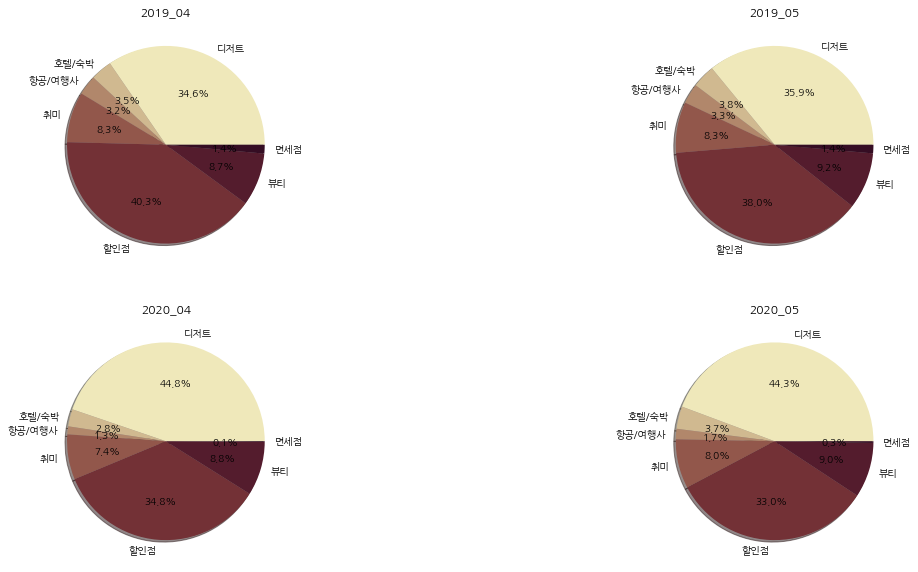

In [ ]:
fig, axs = plt.subplots(2, 2)
labels = '디저트','호텔/숙박','항공/여행사','취미','할인점','뷰티','면세점'
colors = ['#EFE8BA','#D0B990','#B1876B','#92574B','#733136','#541C2D','#350D23']
axs[0, 0].pie(bef_04, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0, 0].set_title('2019_04')
axs[0, 1].pie(bef_05, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0, 1].set_title('2019_05')
axs[1, 0].pie(aft_04, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1, 0].set_title('2020_04')
axs[1, 1].pie(aft_05, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1, 1].set_title('2020_05')                                         
plt.show()

- 위를 보면 디저트와 할인점이 오프라인 매장 카드 사용의 70%이상을 차지하고 있음을 알 수 있다
- 코로나 이후 오프라인 매장의 카드 사용 빈도는 전체적으로 줄었으나 그럼에도 불구하고
- 비율로만 확인해보면 오프라인 전체 대비 디저트 매장에서의 카드 사용률은 코로나 이전보다 높은 것으로 보인다

- 공모전의 주제가 펜데믹 시대를 극복할 마케팅 전략 수립인만큼
- 본 장에서는 지속적으로 카드 사용률이 높은 디저트와 더불어 
- 비율은 높으나 코로나 이후 사용 빈도가 줄은 할인점을 분석의 타겟으로 삼아야한다는 결론을 도출한다

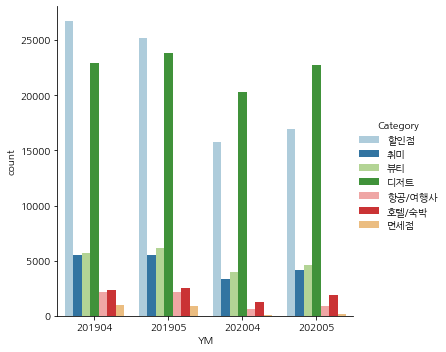

In [ ]:
sns.catplot(x='YM',kind='count',hue = 'Category', palette='Paired',data=Offline);

- 위에서도 마찬가지로 할인점과 디저트의 빈도 수가 높은 것을 확인할 수 있다
- 특히 코로나 이후 빈도 수가 가시적으로 감소한 할인점과 달리 
- 디저트 카테고리는 코로나 이전과 이후에서 빈도 수의 차이가 두드러지게 나타나지 않는다

#### 2) 온라인 매장 분석
- 오프라인 매장과 유사한 방법으로 온라인 매장 또한 분석해보자

In [ ]:
Online = card[card['Group']=='online']

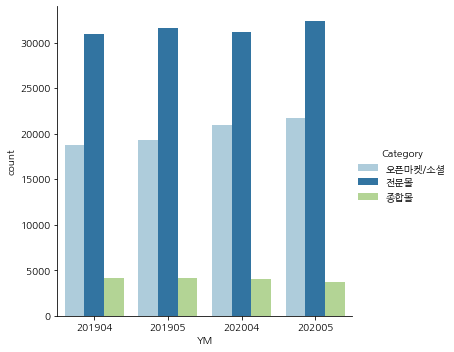

In [ ]:
sns.catplot(x='YM',kind='count',hue = 'Category', palette='Paired',data=Online);

- 온라인 매장의 빈도수를 대강 살펴보면 오픈마켓/소셜과 전문몰에서 사용 빈도가 높은 것으로 확인된다

In [ ]:
def count5(cat1):
  return len(Online[Online['YM']==201904][Online['Category']==cat1].index) 
def count6(cat2):
  return len(Online[Online['YM']==201905][Online['Category']==cat2].index)
def count7(cat3):
  return len(Online[Online['YM']==202004][Online['Category']==cat3].index)
def count8(cat4):
  return len(Online[Online['YM']==202005][Online['Category']==cat4].index)

In [ ]:
on_list = ['오픈마켓/소셜','전문몰','종합몰']

In [ ]:
bef_04=[];bef_05=[];aft_04=[];aft_05=[]
for item in on_list:
  bef_04.append(count5(item))
  bef_05.append(count6(item))
  aft_04.append(count7(item))
  aft_05.append(count8(item))

print(bef_04);print(bef_05);print(aft_04);print(aft_05)

[18766, 30911, 4189]
[19343, 31655, 4175]
[20909, 31139, 4073]
[21724, 32357, 3682]


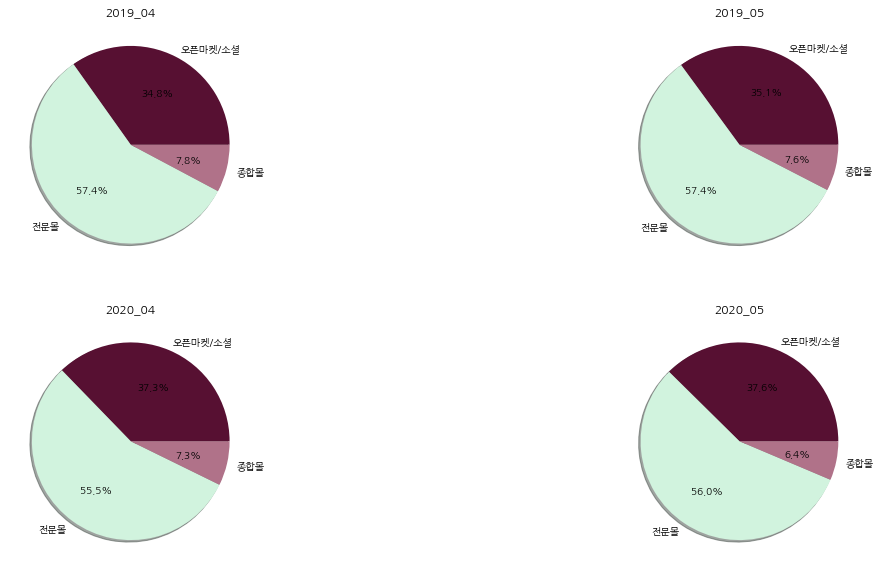

In [ ]:
fig, axs = plt.subplots(2, 2)
labels = '오픈마켓/소셜','전문몰','종합몰'
colors = ['#571032','#D1F3DE','#B07289']
axs[0, 0].pie(bef_04, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0, 0].set_title('2019_04')
axs[0, 1].pie(bef_05, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[0, 1].set_title('2019_05')
axs[1, 0].pie(aft_04, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1, 0].set_title('2020_04')
axs[1, 1].pie(aft_05, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
axs[1, 1].set_title('2020_05')                                         
plt.show()

- 실제로 온라인 매장 내 비율을 확인해보면 전문몰과 오픈마켓이 90%가 넘는 비율을 차지하고 있다
- 오프라인 매장과는 달리 온라인 매장은 코로나 이전과 이후에서 카테고리 비율에서 큰 차이가 나타나지 않는다
- 위를 통해 카드 사용 활성화를 위해서는 코로나로 인해 오히려 사용 빈도가 증가한 온라인 매장에 주목해야한다는 결론을 도출할 수 있다